
# Módulo utilizado para la función resultante

Dentro de la librería Scipy existe una función en optimize que nos permite minimizar el error al cuadrado de la distancia entre la imagen de una función aproximada y una serie de pares ordenados. Realmente, se usa un sistema de ecuaciones para consagrar los parámetros finales de la función resultante. La parte del error se pensó obteniendo un promedio de todos los errores relativos con ayuda de numpy, aprovechando que está importada. Esta es la pieza de código que graficará los resultados y calculará el error:


In [55]:

import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def leasts_squares_graphic(func, x_real_points, y_real_points):
    x_plot = np.linspace(min(x_real_points), max(x_real_points), 100)
    y_plot = func(x_plot)
    
    # Graficar los datos originales y la curva ajustada
    plt.scatter(x_real_points, y_real_points, label='Datos', color='red')
    plt.plot(x_plot, y_plot, label='Ajuste de la función final', color='blue')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

def calculate_error(func, x_real_points, y_real_points):
    x_real_points = np.array(x_real_points)
    y_approx_points = func(x_real_points)
    error = abs(x_real_points - y_approx_points)
    r_error = np.sum(error / y_real_points) / len(y_real_points)
    
    return r_error
    


# Conjunto de ejercicios

## Ejercicio 1

Dados los datos:

In [56]:
x_ej1 = [4, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1]
y_ej1 = [102.56, 130.11, 113.18, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72]


### Literal a)

Construya el polinomio por mínimos cuadrados de grado 1 y calcule el error.


La función resultante es: 71.61*x - 191.57
El error relativo en todos los puntos promedio es: 0.9708703736157682


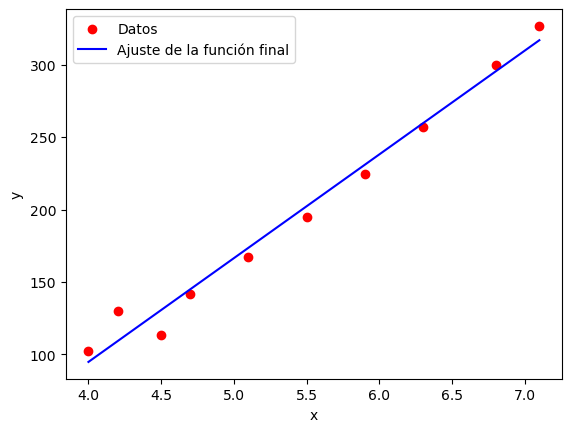

In [57]:

def func(x, a, b):
    return a*x + b

# Minimizando el error
popt, pcov = curve_fit(func, x_ej1, y_ej1)
a, b = popt

# Imprimiendo la función resultante y el error
x_sym = sym.symbols("x")
func_sym = round(a, 2)*x_sym + round(b, 2)
print(f"La función resultante es: {func_sym}")

r_error = calculate_error(lambda x: a*x + b, x_ej1, y_ej1)
print(f"El error relativo en todos los puntos promedio es: {r_error}")

# Graficando
leasts_squares_graphic(lambda x: a*x + b, x_ej1, y_ej1)



Definimos primero la función lineal que se ajustará minimamente a los puntos dados. Para este y los siguientes casos, "popt" contiene las variables "a" o "b" que modifican a la función inicial linear. 

### Literal b)

Construya el polinomio por mínimos cuadrados de grado 2 y calcule el error.

Solamente modificaremos la función que será un parámetro por una cuadrática con 3 incógnitas (a, b, c).


La función resultante es: 8.22*x**2 - 19.31*x + 51.0
El error relativo en todos los puntos promedio es: 0.9737540796582553


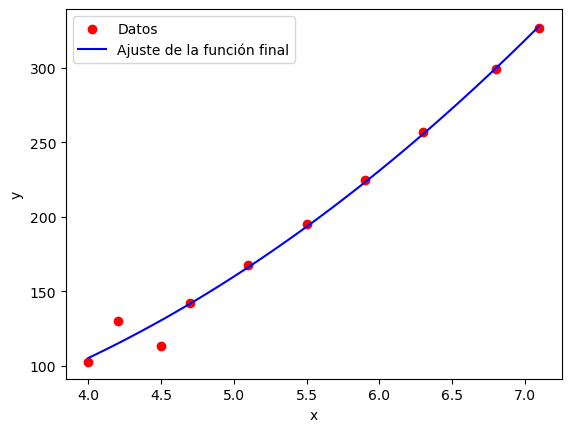

In [58]:

def func(x, a, b, c):
    return a*x**2 + b*x + c

# Minimizando el error
popt, pcov = curve_fit(func, x_ej1, y_ej1)
a, b, c = popt

# Imprimiendo la función resultante y el error
x_sym = sym.symbols("x")
func_sym = round(a, 2)*x_sym**2 + round(b, 2)*x_sym + round(c, 2)
print(f"La función resultante es: {func_sym}")

r_error = calculate_error(lambda x: a*x**2 + b*x + c, x_ej1, y_ej1)
print(f"El error relativo en todos los puntos promedio es: {r_error}")

# Graficando
leasts_squares_graphic(lambda x: a*x**2 + b*x + c, x_ej1, y_ej1)



### Literal c)

Construya el polinomio por mínimos cuadrados de grado 3 y calcule el error.


La función resultante es: -2.61*x**3 + 51.56*x**2 - 254.88*x + 469.16
El error relativo en todos los puntos promedio es: 0.9737126806863465


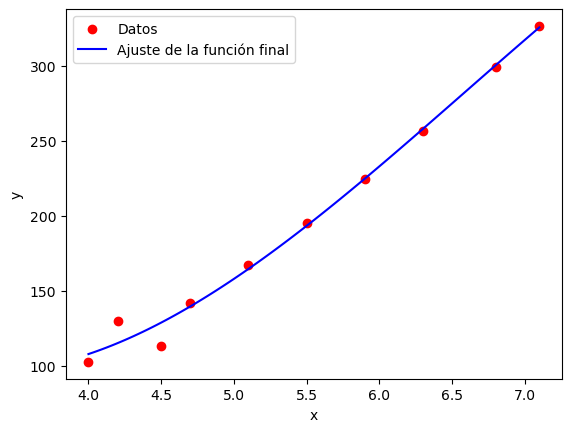

In [59]:

def func(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

# Minimizando el error
popt, pcov = curve_fit(func, x_ej1, y_ej1)
a, b, c, d = popt

# Imprimiendo la función resultante y el error
x_sym = sym.symbols("x")
func_sym = round(a, 2)*x_sym**3 + round(b, 2)*x_sym**2 + round(c, 2)*x_sym + round(d, 2)
print(f"La función resultante es: {func_sym}")

r_error = calculate_error(lambda x: a*x**3 + b*x**2 + c*x + d, x_ej1, y_ej1)
print(f"El error relativo en todos los puntos promedio es: {r_error}")

# Graficando
leasts_squares_graphic(lambda x: a*x**3 + b*x**2 + c*x + d, x_ej1, y_ej1)



### Literal d)

 Construya el polinomio por mínimos cuadrados de la forma $be^{ax}$ y calcule el error. 


La función resultante es: 26.84*exp(0.35*x)
El error relativo en todos los puntos promedio es: 0.979099530943642


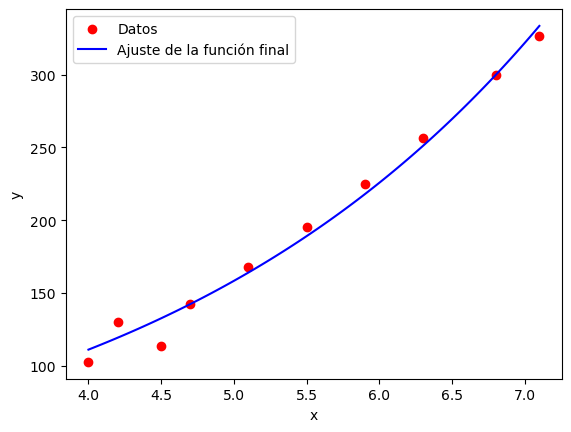

In [60]:

def func(x, a, b):
    return b*np.exp(a*x)

# Minimizando el error
popt, pcov = curve_fit(func, x_ej1, y_ej1)
a, b = popt

# Imprimiendo la función resultante y el error
x_sym = sym.symbols("x")
func_sym = round(b, 2)*sym.exp(round(a, 2)*x_sym)
print(f"La función resultante es: {func_sym}")

r_error = calculate_error(lambda x: b*np.exp(a*x), x_ej1, y_ej1)
print(f"El error relativo en todos los puntos promedio es: {r_error}")

# Graficando
leasts_squares_graphic(lambda x: b*np.exp(a*x), x_ej1, y_ej1)



### Literal e)

 Construya el polinomio por mínimos cuadrados de la forma $bx^a$ y calcule el error.


La función resultante es: 6.28*x**2.02
El error relativo en todos los puntos promedio es: 0.9720570275812594


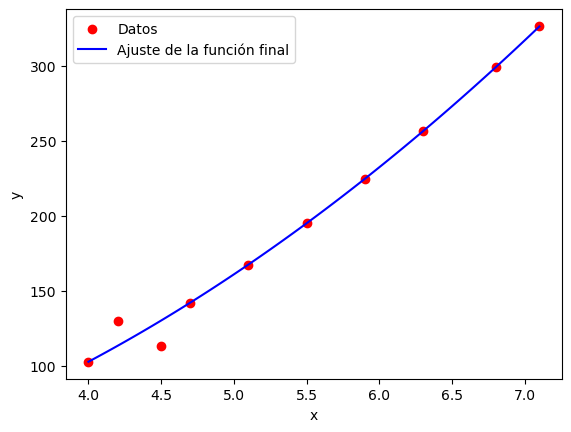

In [61]:

def func(x, a, b):
    return b*x**a

# Minimizando el error
popt, pcov = curve_fit(func, x_ej1, y_ej1)
a, b = popt

# Imprimiendo la función resultante y el error
x_sym = sym.symbols("x")
func_sym = round(b, 2)*x_sym**round(a, 2)
print(f"La función resultante es: {func_sym}")

r_error = calculate_error(lambda x: b*x**a, x_ej1, y_ej1)
print(f"El error relativo en todos los puntos promedio es: {r_error}")

# Graficando
leasts_squares_graphic(lambda x: b*x**a, x_ej1, y_ej1)



## Ejercicio 2

Repita el ejercicio 5 para los siguientes datos.


In [62]:
x_ej2 = [0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6]
y_ej2 = [0.050446, 0.098426, 0.33277, 0.72660, 1.0972, 1.5697, 1.8487, 2.5015]


### Literal a)

Construya el polinomio por mínimos cuadrados de grado 1 y calcule el error.


La función resultante es: 1.67*x - 0.51
El error relativo en todos los puntos promedio es: 1.5036834916593795


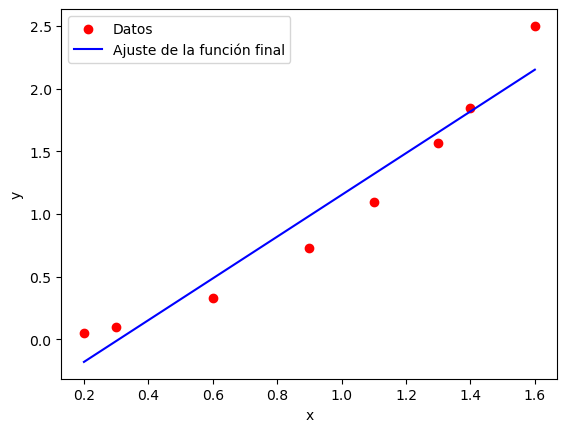

In [63]:

def func(x, a, b):
    return a*x + b

# Minimizando el error
popt, pcov = curve_fit(func, x_ej2, y_ej2)
a, b = popt

# Imprimiendo la función resultante y el error
x_sym = sym.symbols("x")
func_sym = round(a, 2)*x_sym + round(b, 2)
print(f"La función resultante es: {func_sym}")

r_error = calculate_error(lambda x: a*x + b, x_ej2, y_ej2)
print(f"El error relativo en todos los puntos promedio es: {r_error}")

# Graficando
leasts_squares_graphic(lambda x: a*x + b, x_ej2, y_ej2)



### Literal b)

Construya el polinomio por mínimos cuadrados de grado 2 y calcule el error.


La función resultante es: 1.13*x**2 - 0.31*x + 0.09
El error relativo en todos los puntos promedio es: 0.8305132456280757


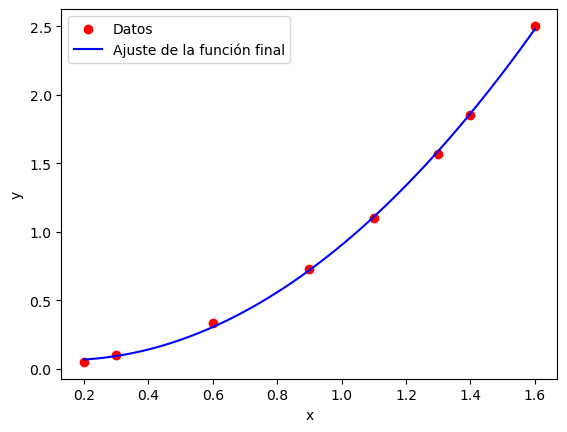

In [64]:

def func(x, a, b, c):
    return a*x**2 + b*x + c

# Minimizando el error
popt, pcov = curve_fit(func, x_ej2, y_ej2)
a, b, c = popt

# Imprimiendo la función resultante y el error
x_sym = sym.symbols("x")
func_sym = round(a, 2)*x_sym**2 + round(b, 2)*x_sym + round(c, 2)
print(f"La función resultante es: {func_sym}")

r_error = calculate_error(lambda x: a*x**2 + b*x + c, x_ej2, y_ej2)
print(f"El error relativo en todos los puntos promedio es: {r_error}")

# Graficando
leasts_squares_graphic(lambda x: a*x**2 + b*x + c, x_ej2, y_ej2)



### Literal c)

Construya el polinomio por mínimos cuadrados de grado 3 y calcule el error.


La función resultante es: 0.27*x**3 + 0.4*x**2 + 0.25*x - 0.02
El error relativo en todos los puntos promedio es: 0.8549642457850933


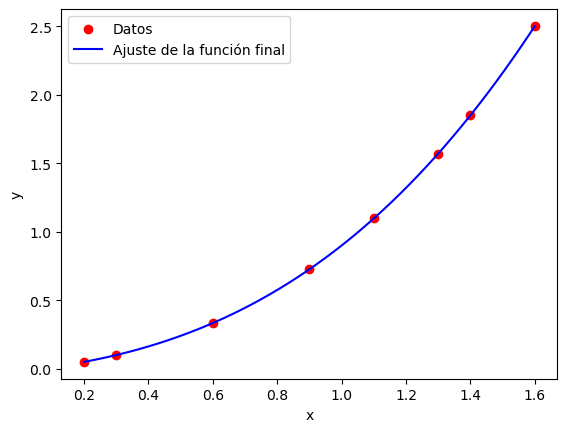

In [65]:

def func(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

# Minimizando el error
popt, pcov = curve_fit(func, x_ej2, y_ej2)
a, b, c, d = popt

# Imprimiendo la función resultante y el error
x_sym = sym.symbols("x")
func_sym = round(a, 2)*x_sym**3 + round(b, 2)*x_sym**2 + round(c, 2)*x_sym + round(d, 2)
print(f"La función resultante es: {func_sym}")

r_error = calculate_error(lambda x: a*x**3 + b*x**2 + c*x + d, x_ej2, y_ej2)
print(f"El error relativo en todos los puntos promedio es: {r_error}")

# Graficando
leasts_squares_graphic(lambda x: a*x**3 + b*x**2 + c*x + d, x_ej2, y_ej2)



### Literal d)

 Construya el polinomio por mínimos cuadrados de la forma $be^{ax}$ y calcule el error. 


La función resultante es: 0.13*exp(1.86*x)
El error relativo en todos los puntos promedio es: 0.3122099285167875


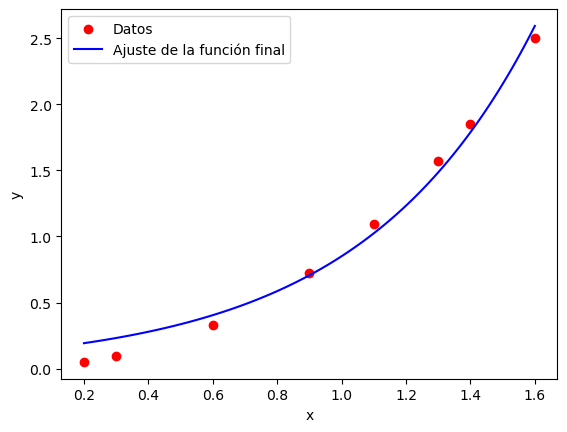

In [66]:

def func(x, a, b):
    return b*np.exp(a*x)

# Minimizando el error
popt, pcov = curve_fit(func, x_ej2, y_ej2)
a, b = popt

# Imprimiendo la función resultante y el error
x_sym = sym.symbols("x")
func_sym = round(b, 2)*sym.exp(round(a, 2)*x_sym)
print(f"La función resultante es: {func_sym}")

r_error = calculate_error(lambda x: b*np.exp(a*x), x_ej2, y_ej2)
print(f"El error relativo en todos los puntos promedio es: {r_error}")

# Graficando
leasts_squares_graphic(lambda x: b*np.exp(a*x), x_ej2, y_ej2)



### Literal e)

 Construya el polinomio por mínimos cuadrados de la forma $bx^a$ y calcule el error.


La función resultante es: 0.91*x**2.14
El error relativo en todos los puntos promedio es: 0.9595557974073141


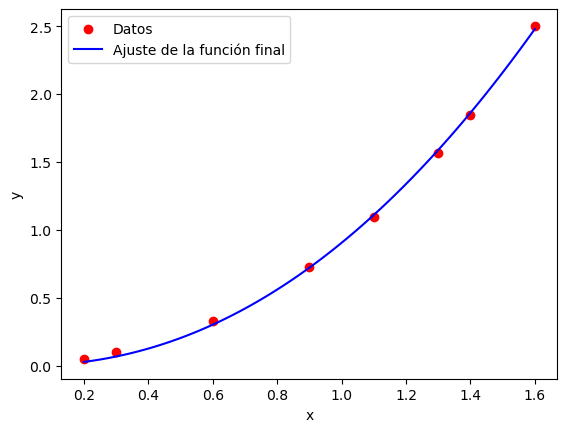

In [67]:

def func(x, a, b):
    return b*x**a

# Minimizando el error
popt, pcov = curve_fit(func, x_ej2, y_ej2)
a, b = popt

# Imprimiendo la función resultante y el error
x_sym = sym.symbols("x")
func_sym = round(b, 2)*x_sym**round(a, 2)
print(f"La función resultante es: {func_sym}")

r_error = calculate_error(lambda x: b*x**a, x_ej2, y_ej2)
print(f"El error relativo en todos los puntos promedio es: {r_error}")

# Graficando
leasts_squares_graphic(lambda x: b*x**a, x_ej2, y_ej2)



## Ejercicio 3

La siguiente tabla muestra los promedios de puntos del colegio de 20 especialistas en matemáticas y ciencias computacionales, junto con las calificaciones que recibieron estos estudiantes en la parte de matemáticas de la prueba ACT (Programa de Pruebas de Colegios Americanos) mientras estaban en secundaria. Grafique estos datos y encuentre la ecuación de la recta por mínimos cuadrados.


In [68]:

punt_ATC = [28, 25, 28, 27, 28, 33, 28, 29, 23, 27,
            29, 28, 27, 29, 21, 28, 28, 26, 30, 24]
prom_puntos = [3.84, 3.21, 3.23, 3.63, 3.75, 3.20, 3.41, 3.38, 3.53, 2.03, 
               3.75, 3.65, 3.87, 3.75, 1.66, 3.12, 2.96, 2.92, 3.1, 2.81]



Primero veamos estos puntos representados en el plano cartesiano por medio de una gráfica:


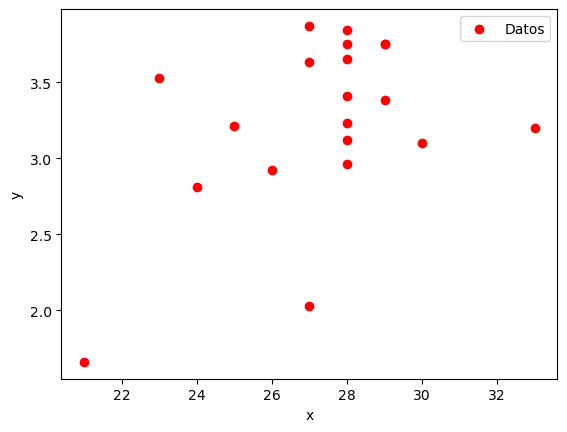

In [69]:

plt.scatter(punt_ATC, prom_puntos, label='Datos', color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()



El ejercicio nos comenta que debemos calcular la ecuación de la "recta", por lo que usaremos el algoritmo:


La función resultante es: 0.1*x + 0.49


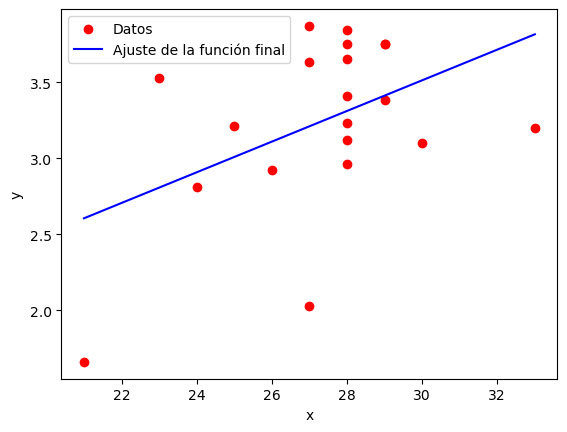

In [70]:

def func(x, a, b):
    return a*x + b

# Minimizando el error
popt, pcov = curve_fit(func, punt_ATC, prom_puntos)
a, b = popt

# Imprimiendo la función resultante
x_sym = sym.symbols("x")
func_sym = round(a, 2)*x_sym + round(b, 2)
print(f"La función resultante es: {func_sym}")

# Graficando
leasts_squares_graphic(lambda x: a*x + b, punt_ATC, prom_puntos)



Realmente parece que estos datos no tienen ninguna relación, esto se podría comprobar calculando una variable de relación. Sin embargo, el gráfico desde un inicio de los puntos eran muy dispersos.

## Ejercicio 4

El siguiente conjunto de datos, presentado al Subcomité Antimonopolio del Senado, muestra las 
características comparativas de supervivencia durante un choque de automóviles de diferentes clases.
Encuentre la recta por mínimos cuadrados que aproxima estos datos (la tabla muest el porcentaje de vehículos que participaron en un accidente en los que la lesión más grave fue fatal o seria).ra


In [71]:
peso_prom = [4800, 3700, 3400, 2800, 1900]
porc_pres = [3.1, 4, 5.2, 6.4, 9.6]


Primero graficamos los puntos en el plano cartesiano:


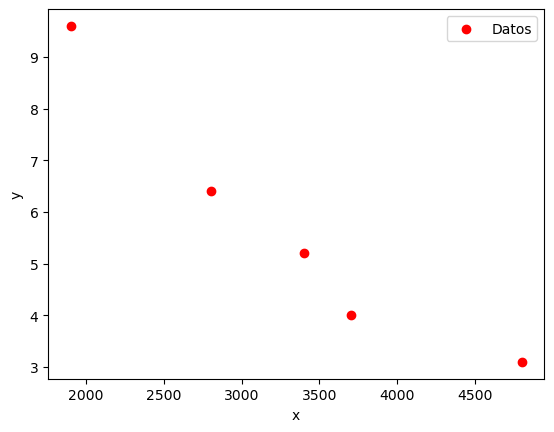

In [72]:

plt.scatter(peso_prom, porc_pres, label='Datos', color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()



Tal parece que nos conviene más una función cuadrática, ya que se ajusta a la mitad de una. Entonces llamamos nuestro algoritmo:


La función resultante es: 19.69 - 0.01*x


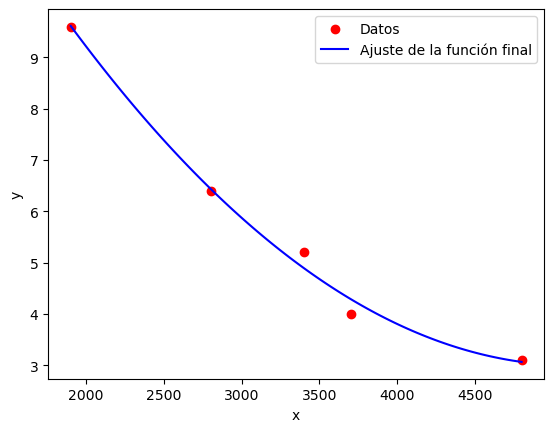

In [73]:

def func(x, a, b, c):
    return a*x**2 + b*x + c

# Minimizando el error
popt, pcov = curve_fit(func, peso_prom, porc_pres)
a, b, c = popt

# Imprimiendo la función resultante y el error
x_sym = sym.symbols("x")
func_sym = round(a, 2)*x_sym**2 + round(b, 2)*x_sym + round(c, 2)
print(f"La función resultante es: {func_sym}")

# Graficando
leasts_squares_graphic(lambda x: a*x**2 + b*x + c, peso_prom, porc_pres)
